In [1]:
import pandas as pd
import spacy
import numpy as np
from tqdm import tqdm
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.sklearn_api import D2VTransformer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression

import sys
sys.path.append('../src')

%load_ext autoreload
%autoreload 1

from datatasks.sample_data import sample_data
%aimport datatasks.sample_data

from models.models import evaluate_model
from models.plot import plot_confusion_matrix

In [2]:
DATA_PATH = '../data/'
DATA_INTERIM_PATH = DATA_PATH + 'interim/'
train = pd.read_csv(DATA_INTERIM_PATH + 'train_p.csv')
val = pd.read_csv(DATA_INTERIM_PATH + 'val_p.csv')

In [3]:
train_s = sample_data(train, 50000, 'train')
val_s = sample_data(val, 10000, 'val')

In [61]:
tqdm.pandas()

In [5]:
tokenizer = ToktokTokenizer()
for df in [train_s, val_s]:
    df['tokens'] = df['preprocessed_text'].progress_apply(lambda x: tokenizer.tokenize(x))

100%|██████████| 9999/9999 [00:14<00:00, 695.13it/s]


In [31]:
tagged_documents_train = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_s['tokens'])]

In [35]:
model = Doc2Vec(vector_size=100, window=5, min_count=5, workers=8, epochs=10)

In [36]:
model.build_vocab(tagged_documents_train)

In [39]:
model.train(tagged_documents_train, total_examples=model.corpus_count, epochs=model.epochs)

In [42]:
X_train = [model.infer_vector(train_s.iloc[i]['tokens']) for i in tqdm(range(0,train_s.shape[0]))]
X_test = [model.infer_vector(val_s.iloc[i]['tokens']) for i in tqdm(range(0,val_s.shape[0]))]
y_train = train_s['hyperpartisan']
y_test = val_s['hyperpartisan']

In [50]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/jmill/anaconda3/envs/SemEval2019-4/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
predicted = clf.predict(X_test)

In [52]:
evaluate_model(y_test, predicted)

              precision    recall  f1-score   support

       False       0.63      0.39      0.48      4999
        True       0.56      0.77      0.65      5000

   micro avg       0.58      0.58      0.58      9999
   macro avg       0.59      0.58      0.56      9999
weighted avg       0.59      0.58      0.56      9999

Accuracy: 0.5788


0.5787578757875788

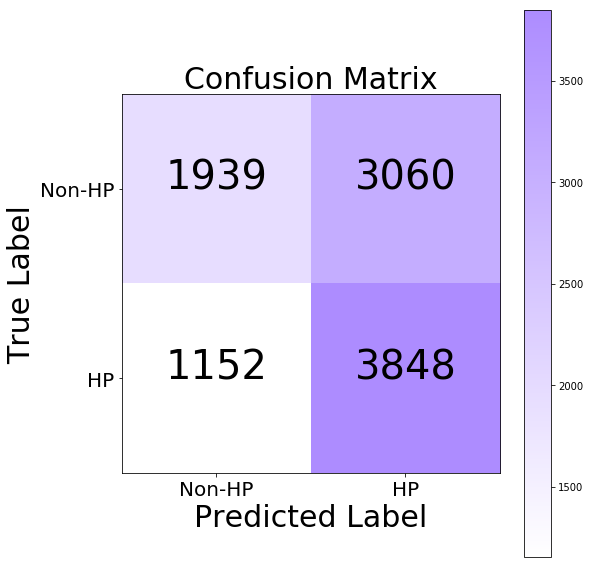

In [53]:
plot_confusion_matrix(y_test, predicted)

In [3]:
from datatasks.preprocess import remove_stopwords_and_tokenize
%aimport datatasks.preprocess

In [4]:
tqdm.pandas()

In [5]:
for df in [train, val]:
    df[['preprocessed_text', 'tokens']] = df.loc[:,'preprocessed_text'].progress_apply(remove_stopwords_and_tokenize)

100%|██████████| 150000/150000 [16:24<00:00, 152.34it/s]


In [6]:
train.to_csv(DATA_INTERIM_PATH + 'train_p.csv', index=False)
val.to_csv(DATA_INTERIM_PATH + 'val_p.csv', index=False)

In [8]:
train[train['preprocessed_text'].str.contains('advertisement')]

,id,published-at,title,article_text,external_links,internal_links,hyperpartisan,bias,url,labeled-by,HP_links_count,nonHP_links_count,unknown_links_count,domain,preprocessed_text,tokens
213,572,2005-07-06,Thursday Edition: Energy Drinks and Kids,"\nThe other day, my 12-year-old daughter and ...",{'http://www.druginfo.adf.org.au/article.asp?C...,{},False,least,https://poynter.org/news/thursday-edition-ener...,publisher,0,0,11,poynter,edition energy drinks and kids the other day m...,"[edition, energy, drinks, and, kids, the, othe..."
225,597,2018-10-20,Reform for California only a vote away,"Oct. 30, 2012 \nBy Katy Grimes \n \nAnyone who...",{'http://ballotpedia.org/wiki/index.php/Califo...,{},False,left-center,https://calwatchdog.com/2012/10/30/reform-for-...,publisher,0,2,9,calwatchdog,reform for california only a vote away ## ####...,"[reform, for, california, only, a, vote, away,..."
438,1166,2014-08-04,Mobile health unproven but not without potenti...,"JOHANNESBURG, South Africa – Towering over dow...",{'http://www.who.int/pmnch/about/governance/pa...,{},False,left-center,https://pri.org/stories/2014-08-04/mobile-heal...,publisher,0,0,3,pri,mobile health unproven but not without potenti...,"[mobile, health, unproven, but, not, without, ..."
1233,3177,2013-01-25,Welfare lottery ban proposed in North Carolina,Does the lottery prey on poor people? North Ca...,{'http://www.upi.com/blog/2013/01/25/Welfare-l...,{},False,left-center,https://pri.org/stories/2013-01-25/welfare-lot...,publisher,0,3,2,pri,welfare lottery ban proposed in north carolina...,"[welfare, lottery, ban, proposed, in, north, c..."
1270,3285,2016-02-09,Israel Frets That Iranian Troops Could Soon Be...,&amp;amp;lt;i&amp;amp;gt;This post originally ...,{},{},True,left,https://truthdig.com/articles/israel-frets-tha...,publisher,0,0,0,truthdig,israel frets that iranian troops could soon be...,"[israel, frets, that, iranian, troops, could, ..."
1517,3888,2017-07-11,"Benjamin Moore, Imperial Paints and others mis...",\nBenjamin Moore &amp; Co. and three other ma...,{},{},True,right,http://foxbusiness.com/features/2017/07/11/fou...,publisher,0,0,0,foxbusiness,benjamin moore imperial paints and others misl...,"[benjamin, moore, imperial, paints, and, other..."
1592,4096,NaN,Does “Breast Cancer Culture” Help?,.......... .......... .......... .......... .....,{},{},False,least,https://abqjournal.com/511186/does-breast-canc...,publisher,0,0,0,abqjournal,does breast cancer culture help pink ribbon bl...,"[does, breast, cancer, culture, help, pink, ri..."
1763,4543,2010-11-16,TSA and America’s Zero Risk Culture,The lede on the DRUDGEREPORT most of Monday sh...,{},{},True,left,https://counterpunch.org/2010/11/16/tsa-and-am...,publisher,0,0,0,counterpunch,tsa and americas zero risk culture the lede on...,"[tsa, and, americas, zero, risk, culture, the,..."
2174,5510,2017-01-06,LL Bean heiress in trouble over pro-Trump PAC,.......... .......... .......... .......... .....,{},{},False,least,https://abqjournal.com/922355/l-l-bean-heiress...,publisher,0,0,0,abqjournal,ll bean heiress in trouble over protrump pac a...,"[ll, bean, heiress, in, trouble, over, protrum..."
2594,6546,2017-08-13,Can Netflix Afford to Lose Disney?,Just a few months after Walt&#160;Disney's (NY...,{'https://seekingalpha.com/article/4028389-net...,{},True,right,http://foxbusiness.com/markets/2017/08/13/can-...,publisher,0,1,9,foxbusiness,can netflix afford to lose disney just a few m...,"[can, netflix, afford, to, lose, disney, just,..."
